# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []


# Build query URL
query_url = f'{url}appid={weather_api_key}&units={units}&q='

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = requests.get(query_url + city).json()
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(query_url + city)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | fort bragg
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | hawaiian paradise park
Processing Record 5 of Set 1 | takamaka
City not found. Skipping...
Processing Record 6 of Set 1 | arawa
Processing Record 7 of Set 1 | tolanaro
Processing Record 8 of Set 1 | ulanhot
Processing Record 9 of Set 1 | guiping
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | wailua homesteads
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | tommot
Processing Record 14 of Set 1 | karamay
City not found. Skipping...
Processing Record 15 of Set 1 | brak
Processing Record 16 of Set 1 | auki
Processing Record 17 of Set 1 | la'ie
Processing Record 18 of Set 1 | amga
Processing Record 19 of Set 1 | kirundo
Processing Record 20 of Set 1 | mogadishu
Processing Record 21 of Set 1 | tranovaho
City not fou

Processing Record 41 of Set 4 | ascoli piceno
Processing Record 42 of Set 4 | tidjikja
Processing Record 43 of Set 4 | mount isa
Processing Record 44 of Set 4 | fortuna foothills
Processing Record 45 of Set 4 | puerto santa
Processing Record 46 of Set 4 | maragogi
Processing Record 47 of Set 4 | sittwe
Processing Record 48 of Set 4 | juan griego
Processing Record 49 of Set 4 | huangshan
Processing Record 0 of Set 5 | cockburn town
Processing Record 1 of Set 5 | turkan
Processing Record 2 of Set 5 | khor
Processing Record 3 of Set 5 | ilulissat
Processing Record 4 of Set 5 | guigue
Processing Record 5 of Set 5 | kodiak
Processing Record 6 of Set 5 | khalkhal
Processing Record 7 of Set 5 | kununurra
Processing Record 8 of Set 5 | susuman
Processing Record 9 of Set 5 | bikenibeu village
Processing Record 10 of Set 5 | mesolongi
Processing Record 11 of Set 5 | fannuj
City not found. Skipping...
Processing Record 12 of Set 5 | gamba
Processing Record 13 of Set 5 | ceerigaabo
Processing Reco

Processing Record 32 of Set 8 | manatutu
City not found. Skipping...
Processing Record 33 of Set 8 | west bay
Processing Record 34 of Set 8 | porto recanati
Processing Record 35 of Set 8 | papao
Processing Record 36 of Set 8 | toliara
Processing Record 37 of Set 8 | hauterive
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | buala
Processing Record 40 of Set 8 | salinopolis
Processing Record 41 of Set 8 | ulsteinvik
Processing Record 42 of Set 8 | thane
Processing Record 43 of Set 8 | parauapebas
Processing Record 44 of Set 8 | san juan
Processing Record 45 of Set 8 | cedeira
Processing Record 46 of Set 8 | oum hadjer
Processing Record 47 of Set 8 | faya-largeau
Processing Record 48 of Set 8 | quatre cocos
Processing Record 49 of Set 8 | chibougamau
Processing Record 0 of Set 9 | betio village
Processing Record 1 of Set 9 | boleslawiec
Processing Record 2 of Set 9 | nema
Processing Record 3 of Set 9 | siwa oasis
Processing Record 4 of Set 9 | island harb

Processing Record 18 of Set 12 | wuhai
Processing Record 19 of Set 12 | plastun
Processing Record 20 of Set 12 | pueblo west
Processing Record 21 of Set 12 | indramayu
Processing Record 22 of Set 12 | cotonou
Processing Record 23 of Set 12 | kralendijk
Processing Record 24 of Set 12 | holualoa
Processing Record 25 of Set 12 | algona
Processing Record 26 of Set 12 | namibe
Processing Record 27 of Set 12 | jinchang
Processing Record 28 of Set 12 | beyneu
Processing Record 29 of Set 12 | penzance
Processing Record 30 of Set 12 | churapcha
Processing Record 31 of Set 12 | ar rutbah
Processing Record 32 of Set 12 | grafenau
Processing Record 33 of Set 12 | griffith
Processing Record 34 of Set 12 | saudarkrokur
Processing Record 35 of Set 12 | sasebo
Processing Record 36 of Set 12 | bonthe
Processing Record 37 of Set 12 | iquique
Processing Record 38 of Set 12 | lompoc
Processing Record 39 of Set 12 | pisco
Processing Record 40 of Set 12 | quzhou
Processing Record 41 of Set 12 | san felipe
P

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,14.26,87,0,2.42,NZ,1684857499
1,fort bragg,35.1390,-79.0060,24.39,58,0,7.20,US,1684857500
2,codrington,-38.2667,141.9667,10.46,86,23,5.17,AU,1684857500
3,hawaiian paradise park,19.5933,-154.9731,20.57,92,100,0.00,US,1684857500
4,arawa,-6.2132,155.5367,24.85,90,94,1.61,PG,1684857501


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.26,87,0,2.42,NZ,1684857499
1,fort bragg,35.1390,-79.0060,24.39,58,0,7.20,US,1684857500
2,codrington,-38.2667,141.9667,10.46,86,23,5.17,AU,1684857500
3,hawaiian paradise park,19.5933,-154.9731,20.57,92,100,0.00,US,1684857500
4,arawa,-6.2132,155.5367,24.85,90,94,1.61,PG,1684857501


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

/var/folders/14/djf7k2tj4qvfttq1kynpcbhw0000gn/T/ipykernel_69810/3475046794.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Max Latitude vs. Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


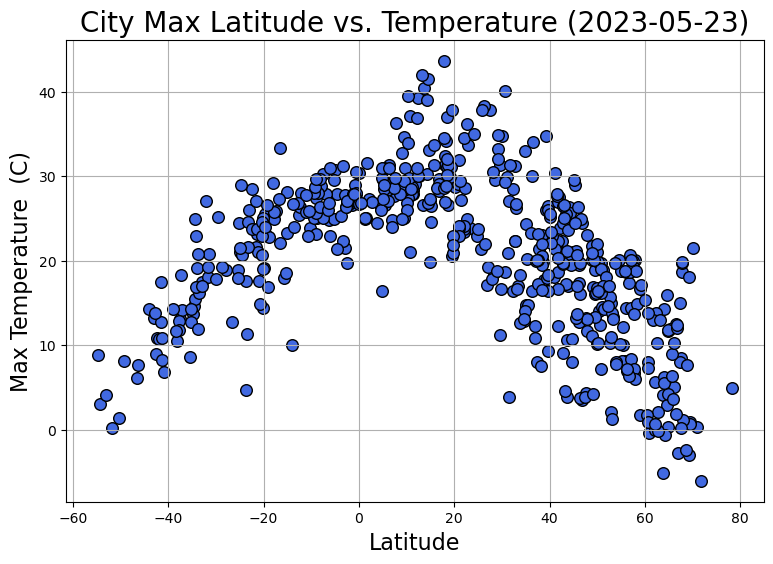

In [25]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Max Temperature  (C)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')


# Save the figure
plt.savefig("../output_data/Fig1.png")
plt.grid()
# Show plot
plt.show()

#### Latitude Vs. Humidity

/var/folders/14/djf7k2tj4qvfttq1kynpcbhw0000gn/T/ipykernel_69810/1955692697.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


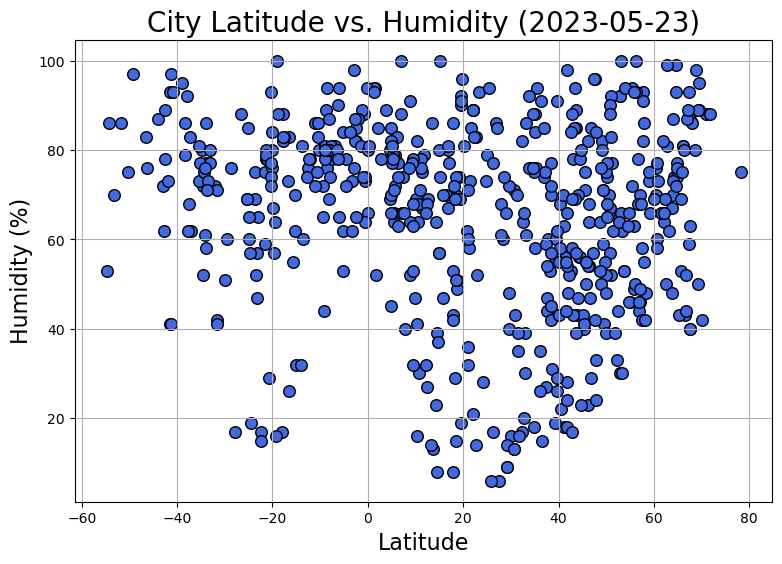

In [26]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')


# Save the figure
plt.savefig("../output_data/Fig2.png")
plt.grid()
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

/var/folders/14/djf7k2tj4qvfttq1kynpcbhw0000gn/T/ipykernel_69810/2447569204.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


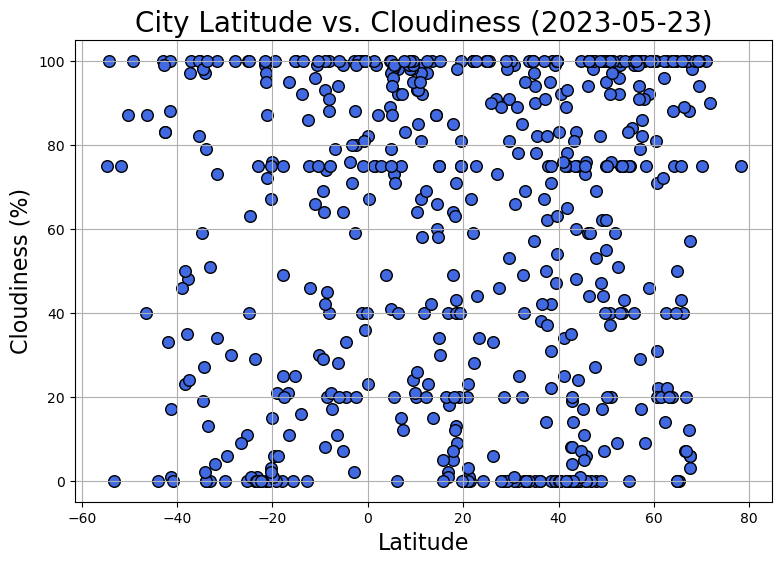

In [27]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')


# Save the figure
plt.savefig("../output_data/Fig3.png")
plt.grid()
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

/var/folders/14/djf7k2tj4qvfttq1kynpcbhw0000gn/T/ipykernel_69810/1172993835.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)


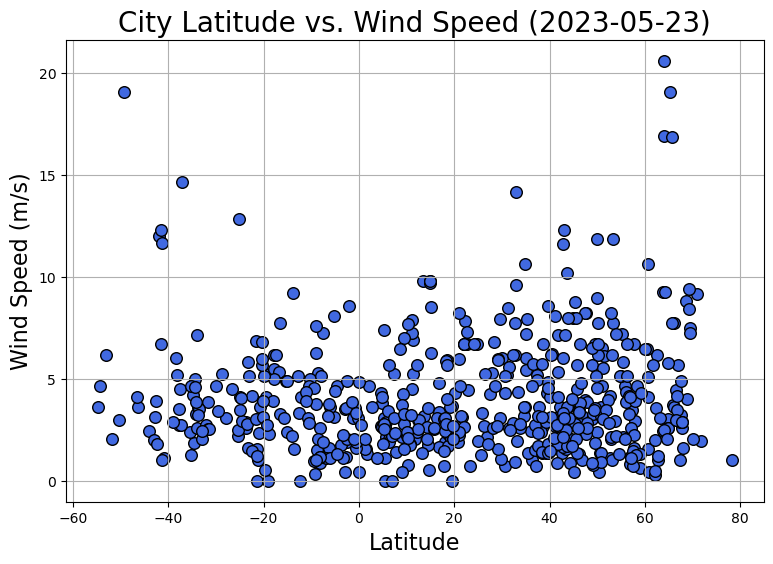

In [28]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', color='royalblue',  s=[70])

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed ' + '(' + str(pd.datetime.now().date()) + ')', fontsize=20)
plt.ylabel('Wind Speed (m/s)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')


# Save the figure
plt.savefig("../output_data/Fig4.png")
plt.grid()
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lineregress(x_values, y_values, xy_coord, y_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.ylabel(y_name, fontsize=16, color='black')
    plt.xlabel('Latitude', fontsize=16, color='black')
    plt.annotate(line_eq, xy_coord, fontsize=18, color='darkred')
    plt.plot(x_values,regress_values, "r-", linewidth=2)
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fort bragg,35.1390,-79.0060,24.39,58,0,7.20,US,1684857500
3,hawaiian paradise park,19.5933,-154.9731,20.57,92,100,0.00,US,1684857500
6,ulanhot,46.0833,122.0833,19.45,23,100,3.46,CN,1684857502
7,guiping,23.3925,110.0814,23.93,93,34,0.71,CN,1684857503
9,wailua homesteads,22.0669,-159.3780,23.44,89,100,6.69,US,1684857504


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,14.26,87,0,2.42,NZ,1684857499
2,codrington,-38.2667,141.9667,10.46,86,23,5.17,AU,1684857500
4,arawa,-6.2132,155.5367,24.85,90,94,1.61,PG,1684857501
5,tolanaro,-25.0319,46.9987,21.04,60,40,4.12,MG,1684857501
8,lebu,-37.6167,-73.6500,13.14,68,24,4.51,CL,1684857503


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.5767067139718123


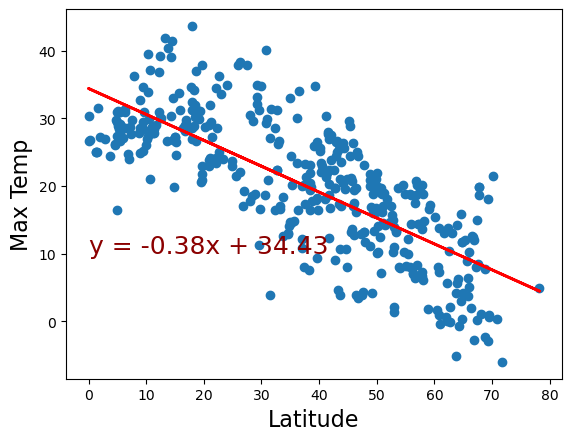

In [16]:
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
lineregress(x_values, y_values, xy_coord=(0,10), y_name = "Max Temp")


The r-squared is: 0.6749510571363795


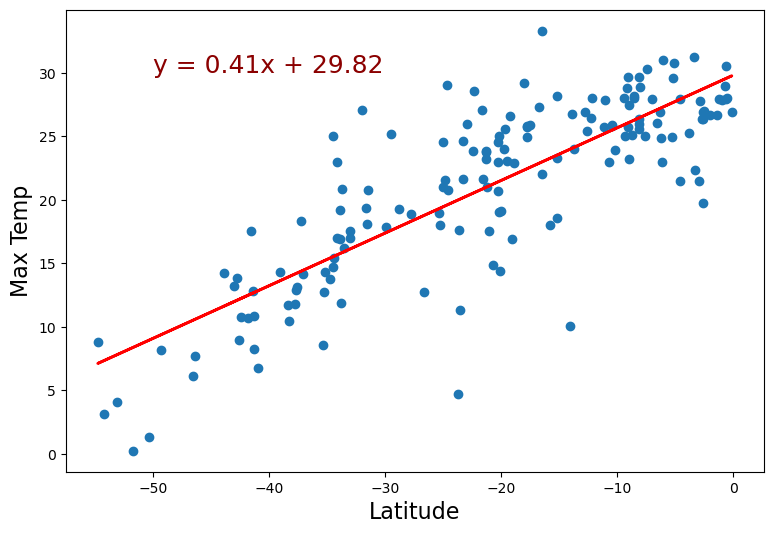

In [17]:
# Linear regression on Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
lineregress(x_values, y_values, xy_coord=(-50,30), y_name = "Max Temp")


**Discussion about the linear relationship:** Per the plots above, it can be seen that, there is a positive correlation between maximum temperature and latitude for the Southern Hemisphere as compared to the strong negative correlation for the Northern Hemisphere. However, the variance of the maximum temperature for the Southern Hemisphere is higher than that for the Northern Hemisphere. Also, it can be concluded that, there is a broader maximum temperature variation for different cities positioned on the same latitude for both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0028037102826257614


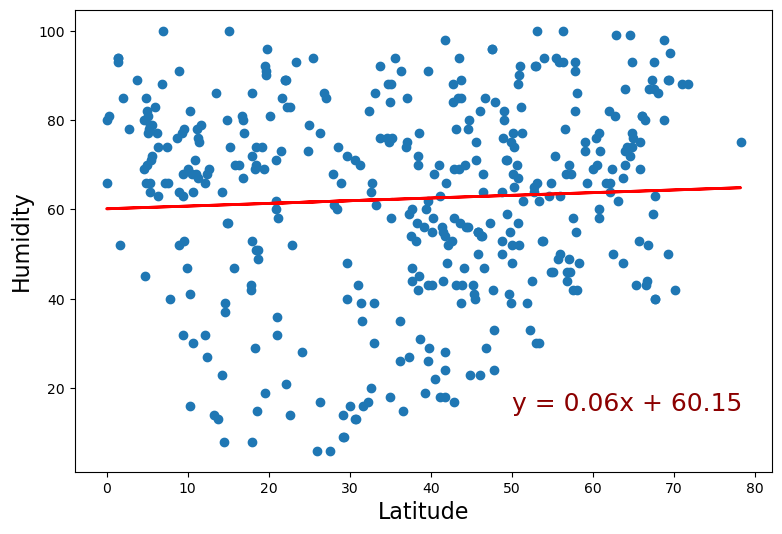

In [18]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
lineregress(x_values, y_values, xy_coord=(50,15), y_name = "Humidity")


The r-squared is: 0.005608313378695286


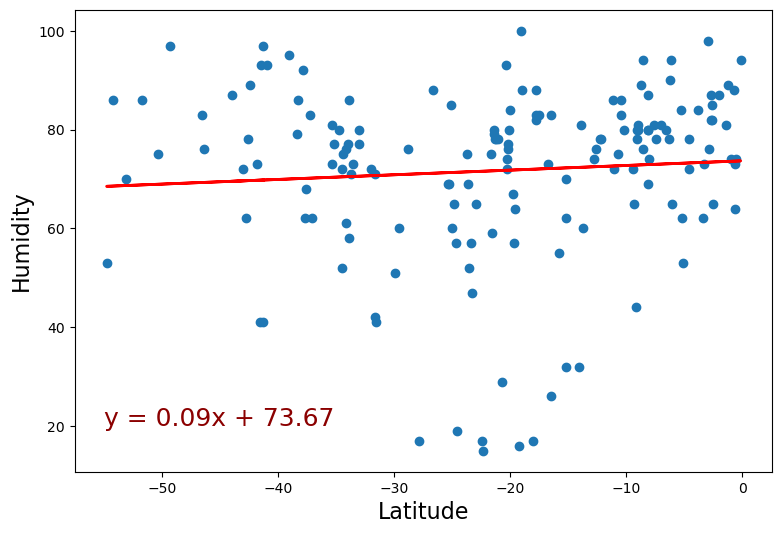

In [19]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
lineregress(x_values, y_values, xy_coord=(-55,20), y_name = "Humidity")


**Discussion about the linear relationship:** There is no correlation between humidity level and city position when moving north from the equator as demonstrated by the Northern Hemisphere scatter plot.Also, there is almost no correlation between humidity levels and a city position when it comes to the Southern Hemisphere too.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0003086249311822237


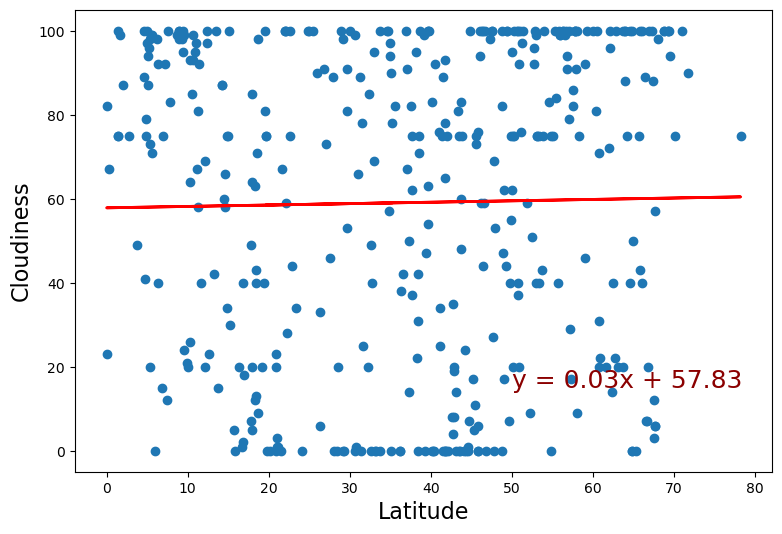

In [20]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
lineregress(x_values, y_values, xy_coord=(50,15), y_name = "Cloudiness")


The r-squared is: 0.0038066262303553507


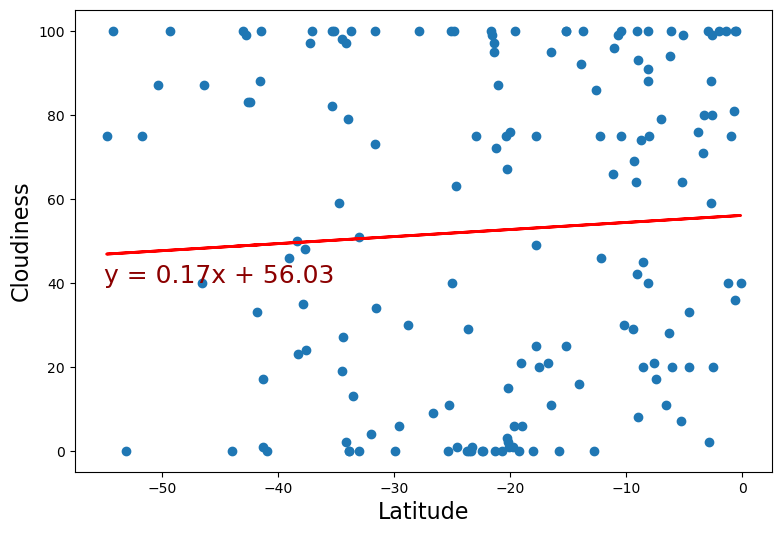

In [21]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
lineregress(x_values, y_values, xy_coord=(-55,40), y_name = "Cloudiness")


**Discussion about the linear relationship:** There is no correlation between cloudiness and latitude (and/or  a distance from the equator) for the cities' positions when it comes both the Northern and the Southern Hemispheres. However, cloudiness levels are widely spread across all latitudes along the whole Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.023206815101854617


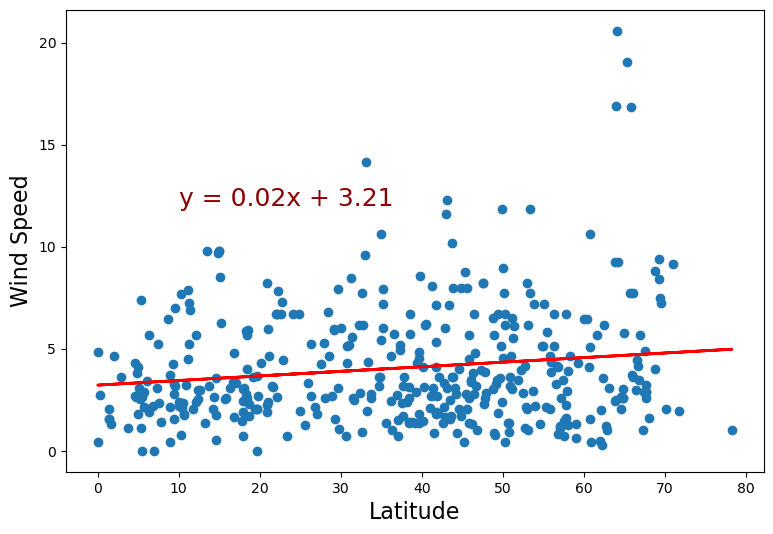

In [22]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
lineregress(x_values, y_values, xy_coord=(10,12), y_name = "Wind Speed")


The r-squared is: 0.05513389017454049


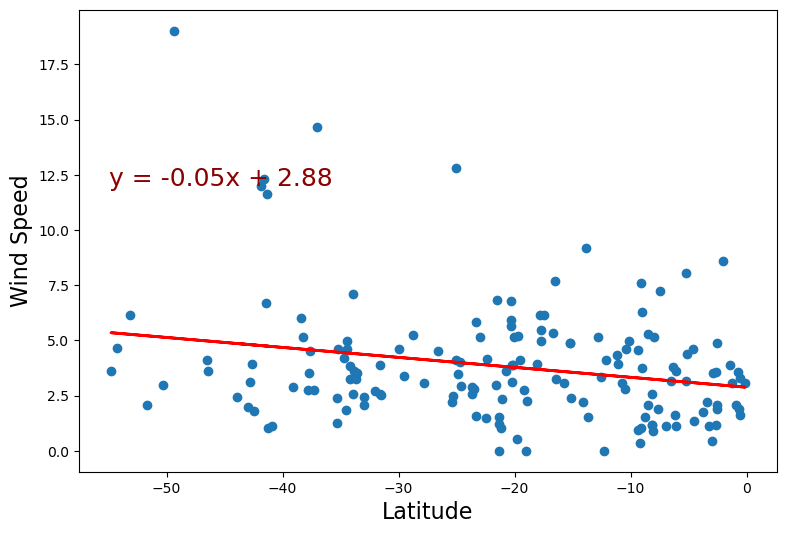

In [23]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
lineregress(x_values, y_values, xy_coord=(-55,12), y_name = "Wind Speed")



**Discussion about the linear relationship:** There is a very low positive correlation between the wind speed and a latitude for the Northern Hemisphere whiles that of the Southern Hemisphere is a low negative correlation. 

 Some other conclusions:
 
. The City Max Latitude vs Temperature scatter plot shows a strong correlation between temperature and latitude as the plot demonstrates maximum temperature changes for different cities depending on their distance away from the equator towards the North and South.

. The City Latitude vs. Humidity plot shows no correlation between humidity levels and latitude.

. The City Latitude vs. Cloudiness scatter plot shows no correlation between cloudiness and latitude.

. The City Latitude vs. Wind Speed plot shows little or no correlation between wind speed and latitude.